# Project Description
This dataset `HealthEouipmentSales.csv` represents data of customers purchasing health equipment from a retail store. it contains the following variables `EquipmentType`, `Age`, `Gender`, `Education`, `MembershipStatus`, `UsageFrequency`,`HealthRating`, `AnnualIncome`, and `Distance`.

* `EquipmentType`:the type of health equipment purchased
* `Age`: age of the customer in years
* `Gender`: gender of the customer
* `Education`: number of years of education completed by the customer
* `MembershipStatus`: whether the customer has a membership plan (e.g., Single, Family)
* `UsageFrequency`: the number of times per week the equipment is expected to be used
* `HealthRating`: self-rated health score of the customer (5 - very healthy, 1 - unhealthy)
* `AnnualIncome`: annual income of the customer in dollars
* `Distance`: the expected distance (in miles) the customer plans to use the equipment



The project focuses on two parts:   
1.Process and analyze the data   
2.Create visualizations

## Questions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# This is your dataset.
data = pd.read_csv("HealthEquipmentSales.csv")
data.head()

,EquipmentType,Age,Gender,Education,MembershipStatus,UsageFrequency,HealthRating,AnnualIncome,Distance
0,Exercise Bike,60,Female,14,None,5,5,87652,163
1,Rowing Machine,57,Male,13,Family,3,1,54994,97
2,Elliptical,33,Male,19,Single,5,4,66761,408
3,Treadmill,46,Female,16,Single,1,1,147388,150
4,Exercise Bike,45,Female,16,None,7,3,96194,172


In [4]:
# 1. How many records are there in the dataset?
    #YOUR CODE HERE
a1=len(data)
print(a1)

100


In [5]:
# 2. How many unique types of equipment are in the dataset?
    #YOUR CODE HERE
a2=len(set(data['EquipmentType'].tolist()))
print(a2)

5


In [6]:
# 3. What is the largest age difference in the dataset (maximum age - minimum age)?
    #YOUR CODE HERE
from scipy import stats
age_max = data['Age'].max()
age_min = data['Age'].min()
a3 = age_max - age_min 
print(a3)

47


In [7]:
# 4. What is the ratio of 'Male' to 'Female' in the column 'Gender' (Male/Female)?
    #YOUR CODE HERE
try:
    male = len(data[data['Gender'] == 'Male'])
    female = len(data[data['Gender'] == 'Female'])
    a4 = male / female
    print(a4)
except:
    raise ZeroDivisionError()

0.6666666666666666


In [8]:
# 5. What is the average education level (in years) of the customers?
    #YOUR CODE HERE
a5 = data['Education'].mean()
print(a5)

14.45


In [9]:
# 6.How many customers have a family membership?
    #YOUR CODE HERE
a6 = len(data[data['MembershipStatus'] == 'Family'])
print(a6)

37


In [10]:
# 7. What is the average usage frequency of the equipment per week?
    #YOUR CODE HERE
a7 = data['UsageFrequency'].mean()
print(a7)

4.02


In [11]:
# 8. What percentage of customers rated their health as very healthy (score of 5)? (in float, e.g. 0.15)
    #YOUR CODE HERE
try:
    a8=len(data[data['HealthRating'] == 5])/a1
    print(a8)
except:
    raise ZeroDivisionError()      

0.22


In [12]:
# 9. What is the highest annual income in the dataset?
    #YOUR CODE HERE
a9 = data['AnnualIncome'].max()
print(a9)   

149638


In [13]:
# 10. How many customers expect to use their equipment for more than 200 miles (200 not included)?
    #YOUR CODE HERE
a10 = len(data[data['Distance'] > 200])
print(a10)    

63


In [14]:
# Write all your answers in a dictionary named answers.
# This dictionary must have keys `"1", "2", "3", ... "10"` and  `a1, a2, a3, ... a10` respectively.
# (e.g., a1 is the variable storing the answer to question 1)

#YOUR CODE HERE
answers = {}
answers["1"] = a1
answers["2"] = a2
answers["3"] = a3
answers["4"] = a4
answers["5"] = a5
answers["6"] = a6
answers["7"] = a7
answers["8"] = a8
answers["9"] = a9
answers["10"] = a10

print(answers)

{'1': 100, '2': 5, '3': 47, '4': 0.6666666666666666, '5': 14.45, '6': 37, '7': 4.02, '8': 0.22, '9': 149638, '10': 63}


In [15]:
# This code should run without errors
try:
    answers["1"]
except:
    raise NotImplementedError()

## Visualization

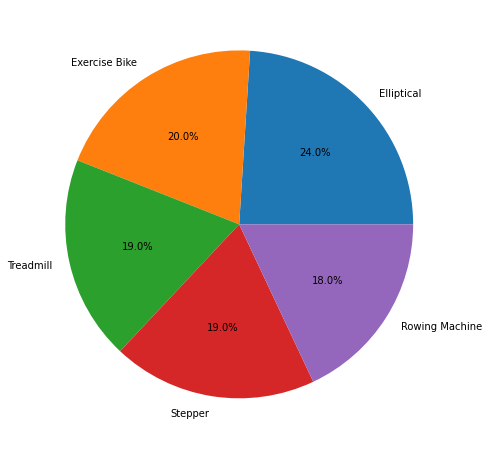

In [16]:
# 1. Create a pie chart showing the distribution of equipment types in the dataset.
    #YOUR CODE HERE
data['EquipmentType'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(8,8))

plt.ylabel('')
plt.show()


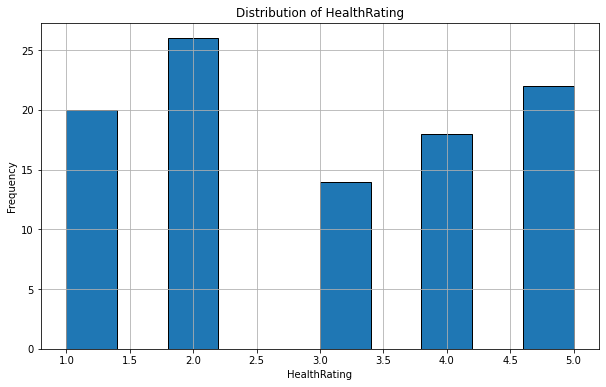

In [17]:
# 2. Create a bar chart showing the distribution of customer health ratings.
    #YOUR CODE HERE
import math

plt.figure(figsize=(10, 6))


#According to the square root rule
k = math.sqrt(a1)
k = int(k)


plt.hist(data['HealthRating'], bins=k, edgecolor='black')
plt.title('Distribution of HealthRating')
plt.xlabel('HealthRating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


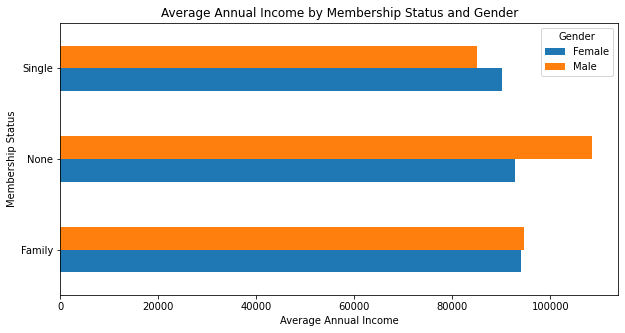

Membership Status: None
Z-Test:1.1889081799641448, P-Value:0.23447580089487674
There is no significant difference in income between males and females.
Membership Status: Family
Z-Test:0.05618273977861403, P-Value:0.9551962311039659
There is no significant difference in income between males and females.
Membership Status: Single
Z-Test:-0.39950736318786373, P-Value:0.6895193993732129
There is no significant difference in income between males and females.


In [19]:
# 3.Draw a horizontal bar plot showing membership status (on the y-axis) and average annual income (on the x-axis), with genderdistinction.
    #YOUR CODE HERE
import numpy as np
from statsmodels.stats.weightstats import ztest
data['AnnualIncome'] = pd.to_numeric(data['AnnualIncome'], errors='coerce') # Error data is transferred to None

data = data.dropna(subset=['AnnualIncome']) # delete None

grouped = data.groupby(['MembershipStatus', 'Gender'])['AnnualIncome'].mean().unstack() # MultiIndex

grouped.plot(kind='barh', stacked=False, figsize=(10, 5))

plt.title('Average Annual Income by Membership Status and Gender')
plt.xlabel('Average Annual Income')
plt.ylabel('Membership Status')

plt.legend(title='Gender')

plt.show()

membership_statuses = data['MembershipStatus'].unique()

for status in membership_statuses:
    group_male = data[(data['MembershipStatus'] == status) & (data['Gender'] == 'Male')]['AnnualIncome']
    group_female = data[(data['MembershipStatus'] == status) & (data['Gender'] == 'Female')]['AnnualIncome']
    
    if len(group_male) < 30 and len(group_female) < 30:
        z_stat, p_value = ztest(group_male, group_female)
        print(f"Membership Status: {status}")
        print(f"Z-Test:{z_stat}, P-Value:{p_value}")
    
        if p_value < 0.05:
            print("There is a significant difference in income between males and females.")
        else:
            print("There is no significant difference in income between males and females.")